In [1]:
import numpy as np


In [2]:
from numpy import random

x = random.normal(loc=1, scale=0.3, size=(1, 100))
y = random.normal(loc=1, scale=0.3, size=(1, 100))
x1 = random.normal(loc=-1, scale=0.3, size=(1, 100))
y1 = random.normal(loc=-1, scale=0.3, size=(1, 100))


In [3]:
y[0, 0]


0.7091783755425438

In [4]:
data = np.zeros((100, 3))
for i in range(100):
    d = np.array((x[0, i], y[0, i], -1))
    data[i] = d


In [5]:
print(data)


[[ 0.80055753  0.70917838 -1.        ]
 [ 1.16651665  1.05610567 -1.        ]
 [ 1.13654327  0.84429094 -1.        ]
 [ 0.96690323  1.01164118 -1.        ]
 [ 0.76638767  1.46977489 -1.        ]
 [ 1.4885535   1.28836703 -1.        ]
 [ 1.14025746  0.7921286  -1.        ]
 [ 0.80655862  0.82295402 -1.        ]
 [ 1.03920256  0.9829504  -1.        ]
 [ 0.97289559  0.80610353 -1.        ]
 [ 1.24769739  0.27792275 -1.        ]
 [ 0.76447972  1.27848776 -1.        ]
 [ 0.82926627  1.12081884 -1.        ]
 [ 0.90910898  0.73072818 -1.        ]
 [ 0.93494383  0.8548362  -1.        ]
 [ 1.21229693  0.76519842 -1.        ]
 [ 0.85343751  0.85748753 -1.        ]
 [ 0.72163693  0.64670656 -1.        ]
 [ 0.99280209  1.029003   -1.        ]
 [ 1.72868469  1.39321084 -1.        ]
 [ 1.31290804  0.75862536 -1.        ]
 [ 0.85355486  0.9993719  -1.        ]
 [ 1.61239638  0.94962546 -1.        ]
 [ 0.83067705  0.83843023 -1.        ]
 [ 0.88442085  1.08292249 -1.        ]
 [ 0.77187774  0.86454835

In [6]:
data1 = np.zeros((100, 3))
for i in range(100):
    d = np.array((x1[0, i], y1[0, i], 1))
    data1[i] = d


/home/amir/uni/nndl/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


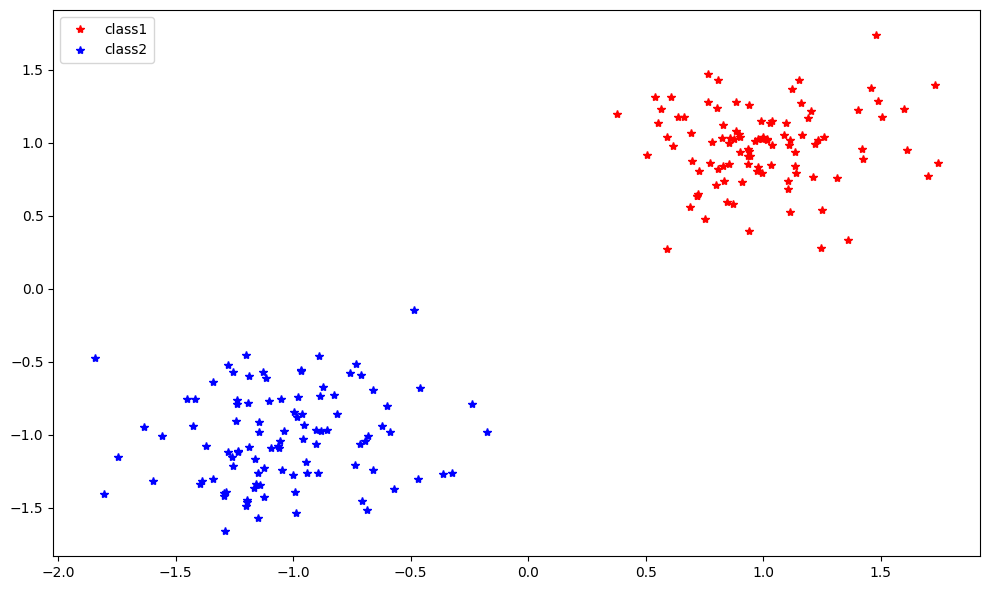

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(data[:, 0], data[:, 1], 'r*')
plt.plot(data1[:, 0], data1[:, 1], 'b*')
plt.legend(["class1", "class2"], loc="upper left")
plt.show()


In [8]:
np.vstack((data, data1))[:, 0:2]


array([[ 0.80055753,  0.70917838],
       [ 1.16651665,  1.05610567],
       [ 1.13654327,  0.84429094],
       [ 0.96690323,  1.01164118],
       [ 0.76638767,  1.46977489],
       [ 1.4885535 ,  1.28836703],
       [ 1.14025746,  0.7921286 ],
       [ 0.80655862,  0.82295402],
       [ 1.03920256,  0.9829504 ],
       [ 0.97289559,  0.80610353],
       [ 1.24769739,  0.27792275],
       [ 0.76447972,  1.27848776],
       [ 0.82926627,  1.12081884],
       [ 0.90910898,  0.73072818],
       [ 0.93494383,  0.8548362 ],
       [ 1.21229693,  0.76519842],
       [ 0.85343751,  0.85748753],
       [ 0.72163693,  0.64670656],
       [ 0.99280209,  1.029003  ],
       [ 1.72868469,  1.39321084],
       [ 1.31290804,  0.75862536],
       [ 0.85355486,  0.9993719 ],
       [ 1.61239638,  0.94962546],
       [ 0.83067705,  0.83843023],
       [ 0.88442085,  1.08292249],
       [ 0.77187774,  0.86454835],
       [ 0.93423681,  0.95958471],
       [ 0.88277672,  1.28064833],
       [ 1.48026111,

In [9]:
class Adaline(object):

    def __init__(self, learn_rate=0.01, iterations=100):
        self.learn_rate = learn_rate
        self.iterations = iterations

    def fit(self, X, y, biased_X=False,):
        if not biased_X:
            X = self._add_bias(X)
        self._initial_weights(X)
        self.cost = []
        for cycle in range(self.iterations):
            # output_pred = self._activation(self._net_input(X))
            output_pred = self.predict(X, biased_X=True)
            errors = y - output_pred
            # errors = errors.reshape(1, -1)
            self.weights[0:2] += (self.learn_rate * X[:, 0:2].T.dot(errors))
            self.weights[2] += (self.learn_rate * errors).sum()
            cost = (errors**2).sum() / 2.0
            cond = self.learn_rate * (errors.reshape(1, -1).T * X)
            self.cost.append(cost)

            if np.all(cond > 0):
                return self
            else:
                continue
        return self

    def _net_input(self, X):
        return np.dot(X, self.weights)

    def predict(self, X, biased_X=False):
        if not biased_X:
            X = self._add_bias(X)
        return np.where(self._activation(self._net_input(X)) >= 0.0, 1, -1)

    def _add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        biased_X = np.hstack((bias, X))
        return biased_X

    def _initial_weights(self, X):
        random_gen = np.random.RandomState(42)
        self.weights = random_gen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        return self

    def _activation(self, X):
        return X


In [10]:
# create a perceptron classifier and train on our data
classifier = Adaline(learn_rate=0.001, iterations=100)
s = np.vstack((data, data1))[:, 0:2]
t = np.vstack((data, data1))[:, 2]
a = classifier.fit(s, t)

In [11]:
print(classifier.cost)


[316.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


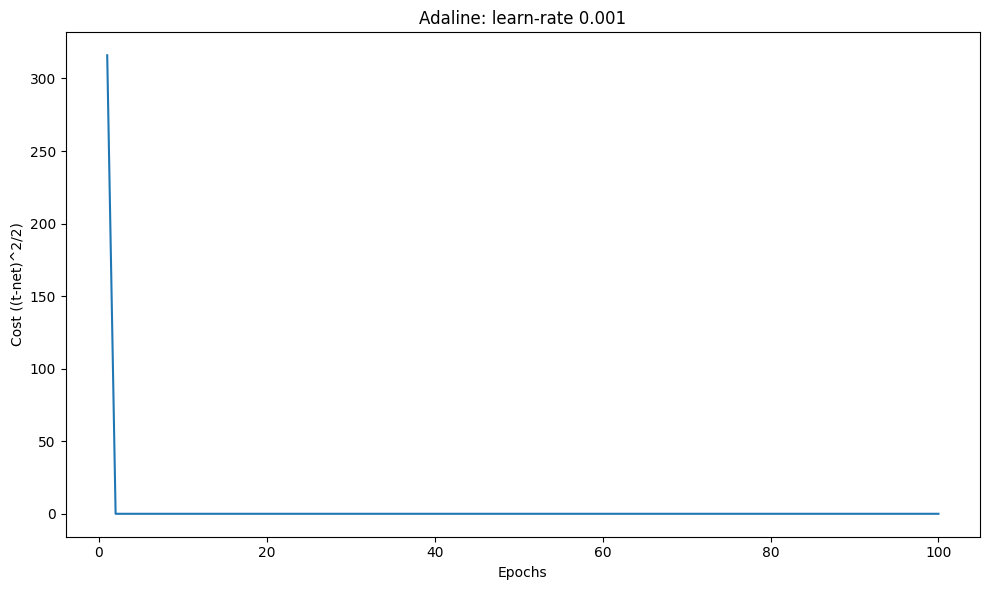

In [12]:

# plot cost after each iteration of training
plt.plot(range(1, len(classifier.cost) + 1), classifier.cost)
plt.title("Adaline: learn-rate 0.001")
plt.xlabel('Epochs')
plt.ylabel('Cost ((t-net)^2/2)')
plt.show()


In [13]:
classifier.predict(data[:, 0:2])


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [14]:
classifier.predict(data1[:, 0:2])


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
(w2, w1, b) = a.weights

print(w2, w1, b)


-0.07903285846988768 -0.3196630069056534 -0.07752311461899312


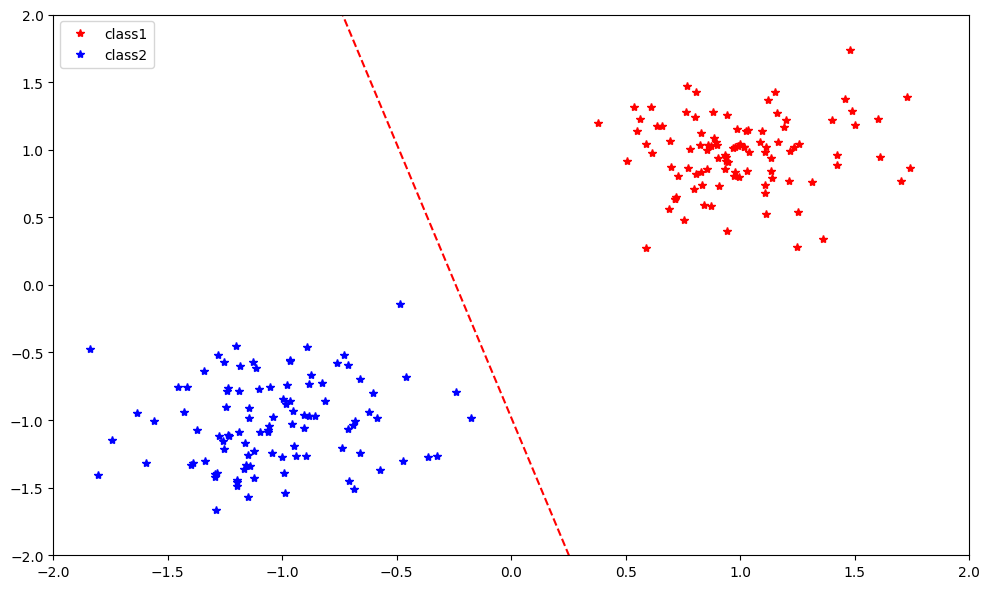

In [16]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(data[:, 0], data[:, 1], 'r*')
plt.plot(data1[:, 0], data1[:, 1], 'b*')
plt.legend(["class1", "class2"], loc="upper left")
x = np.linspace(-5, 5, 100)
y = - (w1/w2) * x - b/w2
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(x, y, "--r")
plt.show()


# B

In [17]:
from numpy import random
x2 = random.normal(loc=0, scale=0.6, size=(1, 100))
y2 = random.normal(loc=0, scale=0.6, size=(1, 100))
x3 = random.normal(loc=2, scale=0.8, size=(1, 100))
y3 = random.normal(loc=2, scale=0.8, size=(1, 100))


In [18]:
data2 = np.zeros((100, 3))
for i in range(100):
    d = np.array((x2[0, i], y2[0, i], -1))
    data2[i] = d


In [19]:
data3 = np.zeros((100, 3))
for i in range(100):
    d = np.array((x3[0, i], y3[0, i], 1))
    data3[i] = d


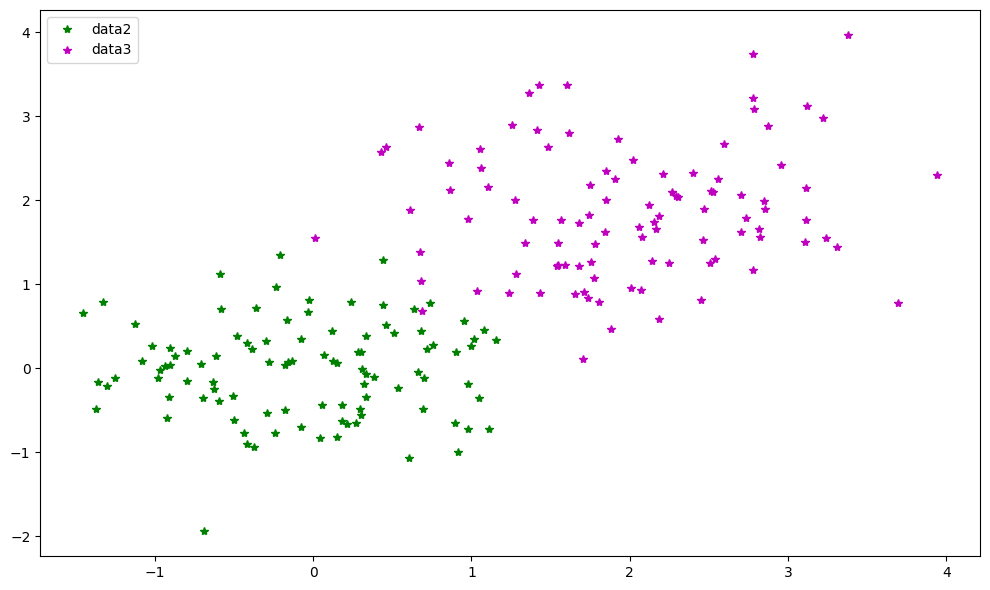

In [20]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(data2[:, 0], data2[:, 1], 'g*')
plt.plot(data3[:, 0], data3[:, 1], 'm*')
plt.legend(["data2", "data3"], loc="upper left")
plt.show()


In [21]:
# create a perceptron classifier and train on our data
classifier = Adaline(learn_rate=0.001, iterations=100)
s=np.vstack((data2, data3))[:, 0:2]
t=np.vstack((data2, data3))[:, 2]
a=classifier.fit(s, t)


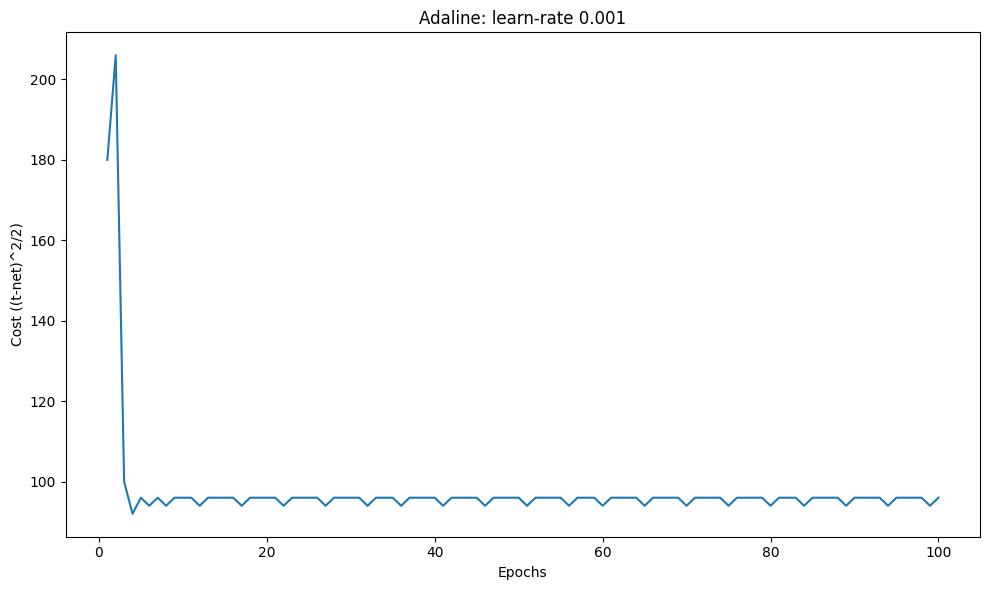

In [22]:
# print(classifier.cost)
# plot cost after each iteration of training
plt.plot(range(1, len(classifier.cost) + 1), classifier.cost)
plt.title("Adaline: learn-rate 0.001")
plt.xlabel('Epochs')
plt.ylabel('Cost ((t-net)^2/2)')
plt.show()


In [23]:
(w2, w1, b) = classifier.weights
# (b, w1, w2) = a.w_ 
# b = b1
# w12, w11 = w2
# b = b1

print(w2, w1, b)


-0.5830328584698881 1.1573459374486896 -0.5815231146189934


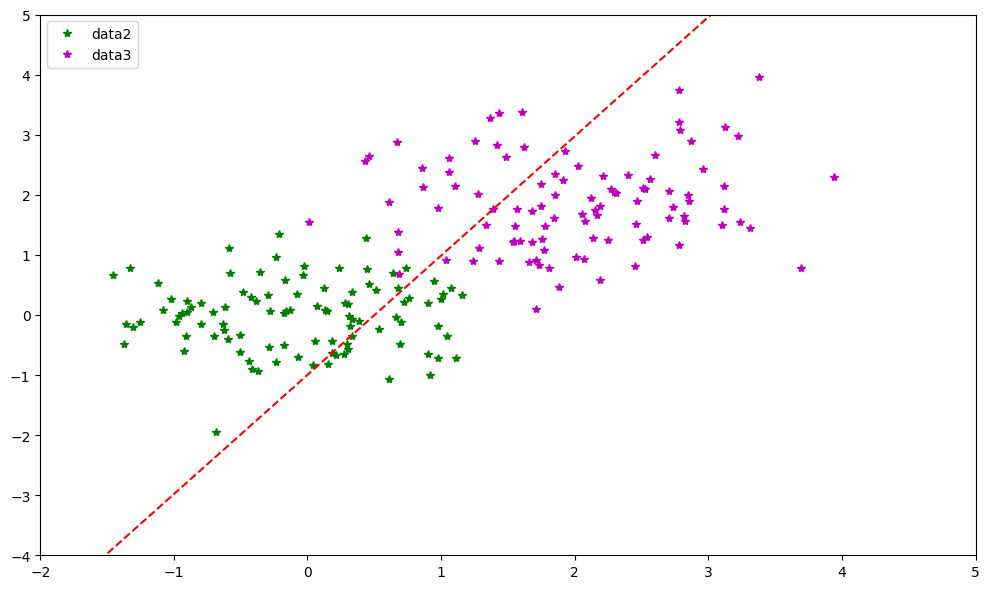

In [24]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(data2[:, 0], data2[:, 1], 'g*')
plt.plot(data3[:, 0], data3[:, 1], 'm*')
plt.legend(["data2", "data3"], loc="upper left")
x = np.linspace(-5, 5, 100)
plt.xlim(-2, 5)
plt.ylim(-4, 5)
y = - (w1/w2) * x - b/w2
plt.plot(x, y, "--r")
plt.show()


In [25]:
classifier.predict(data2[:, 0:2])


array([ 1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1])

In [26]:
classifier.predict(data3[:, 0:2])


array([-1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1])